# Mercado de Mini Índice

O dataset é composto pela data da operação(Date), a hora(Time), o quanto o mercado abriu (Open), quanto fechou(Close), maior valor chegado no instante(High), menor valor chegado na operação (Low), quantidade de operações realizadas (Vol).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_frame1 = pd.read_csv("/content/drive/MyDrive/9P/DSC/datasets/WINN_M1.csv",sep='\t')
data_frame1

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2020.10.15,11:49:00,98565,98575,98530,98575,2373,9001,5
1,2020.10.15,11:50:00,98570,98625,98570,98600,5483,19111,5
2,2020.10.15,11:51:00,98595,98600,98535,98580,4572,17663,5
3,2020.10.15,11:52:00,98575,98620,98535,98615,3536,13143,5
4,2020.10.15,11:53:00,98620,98625,98575,98610,3729,13702,5
...,...,...,...,...,...,...,...,...,...
171033,2022.02.07,18:21:00,112235,112260,112215,112225,564,5849,0
171034,2022.02.07,18:22:00,112235,112250,112225,112245,330,2390,0
171035,2022.02.07,18:23:00,112245,112335,112240,112290,717,5949,0
171036,2022.02.07,18:24:00,112290,112335,112245,112245,264,2860,0


## Operações

Add coluna se subiu ou desceu

In [ ]:
data_frame1.loc[lambda data_frame1: data_frame1['<OPEN>'] > data_frame1['<CLOSE>'], "Subiu"] = 0
data_frame1.loc[lambda data_frame1: data_frame1['<OPEN>'] < data_frame1['<CLOSE>'], "Subiu"] = 1
data_frame1.loc[lambda data_frame1: data_frame1['<OPEN>'] == data_frame1['<CLOSE>'], "Subiu"] = 2
data_frame1.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,Subiu
0,2020.10.15,11:49:00,98565,98575,98530,98575,2373,9001,5,1.0
1,2020.10.15,11:50:00,98570,98625,98570,98600,5483,19111,5,1.0
2,2020.10.15,11:51:00,98595,98600,98535,98580,4572,17663,5,0.0
3,2020.10.15,11:52:00,98575,98620,98535,98615,3536,13143,5,1.0
4,2020.10.15,11:53:00,98620,98625,98575,98610,3729,13702,5,0.0


In [ ]:
data_frame1['Subiu'].unique()

array([1., 0., 2.])

## Perguntas Relevantes

Quantas operações são feitas por dia?

Sobe mais que desce?

Horarios que mais sobem?


In [ ]:
# Lista de valores da soma das quantidades que subiram e desceram
subiram = []

In [ ]:
def qnt_subir(df, n):
    return df.loc[lambda df: df["Subiu"] == n]

In [ ]:
# Tabela das operações que descem
subiram.append(qnt_subir(data_frame1,0).shape[0])
qnt_subir(data_frame1,0)

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,Subiu
2,2020.10.15,11:51:00,98595,98600,98535,98580,4572,17663,5,0.0
4,2020.10.15,11:53:00,98620,98625,98575,98610,3729,13702,5,0.0
6,2020.10.15,11:55:00,98650,98665,98610,98615,4021,13669,5,0.0
9,2020.10.15,11:58:00,98660,98675,98630,98655,2977,11276,5,0.0
11,2020.10.15,12:00:00,98675,98720,98635,98665,8265,30503,5,0.0
...,...,...,...,...,...,...,...,...,...,...
171024,2022.02.07,18:12:00,112235,112275,112200,112210,1026,11422,0,0.0
171026,2022.02.07,18:14:00,112220,112250,112210,112215,555,5751,0,0.0
171027,2022.02.07,18:15:00,112220,112230,112170,112195,1245,11301,0,0.0
171033,2022.02.07,18:21:00,112235,112260,112215,112225,564,5849,0,0.0


In [ ]:
# Tabela das operações que sobem
subiram.append(qnt_subir(data_frame1,1).shape[0])
qnt_subir(data_frame1,1)

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,Subiu
0,2020.10.15,11:49:00,98565,98575,98530,98575,2373,9001,5,1.0
1,2020.10.15,11:50:00,98570,98625,98570,98600,5483,19111,5,1.0
3,2020.10.15,11:52:00,98575,98620,98535,98615,3536,13143,5,1.0
5,2020.10.15,11:54:00,98610,98655,98590,98655,5040,17128,5,1.0
7,2020.10.15,11:56:00,98615,98675,98585,98660,5008,17128,5,1.0
...,...,...,...,...,...,...,...,...,...,...
171028,2022.02.07,18:16:00,112195,112200,112155,112200,608,5142,0,1.0
171030,2022.02.07,18:18:00,112190,112230,112190,112200,392,4242,0,1.0
171031,2022.02.07,18:19:00,112200,112260,112180,112235,894,10658,0,1.0
171034,2022.02.07,18:22:00,112235,112250,112225,112245,330,2390,0,1.0


In [ ]:
# Tabela que não o preço é constante
subiram.append(qnt_subir(data_frame1,2).shape[0])
qnt_subir(data_frame1,2)

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,Subiu
22,2020.10.15,12:11:00,98900,98950,98895,98900,3952,14171,5,2.0
34,2020.10.15,12:23:00,98900,98935,98880,98900,5152,19660,5,2.0
52,2020.10.15,12:41:00,98975,98995,98960,98975,2317,9072,5,2.0
57,2020.10.15,12:46:00,99005,99015,98985,99005,2099,8235,5,2.0
74,2020.10.15,13:03:00,98985,98995,98950,98985,3688,14706,5,2.0
...,...,...,...,...,...,...,...,...,...,...
170998,2022.02.07,17:46:00,112275,112330,112255,112275,1449,30182,0,2.0
171021,2022.02.07,18:09:00,112160,112185,112130,112160,739,9037,0,2.0
171029,2022.02.07,18:17:00,112195,112210,112175,112195,414,4867,0,2.0
171032,2022.02.07,18:20:00,112235,112275,112235,112235,613,6713,0,2.0


<BarContainer object of 3 artists>

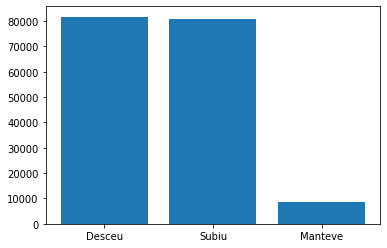

In [ ]:
plt.bar(['Desceu','Subiu','Manteve'],subiram)

In [ ]:
# Os dias das operações
dias = data_frame1.loc[:, '<DATE>'].unique()

In [ ]:
# Numero de operações por dia
quantidade_dias = {dia: (data_frame1['<DATE>'] == dia).sum() for dia in dias}

In [ ]:
# Numero de dias e quantidade de cada dia
print(len(quantidade_dias))

quantidade_dias.values()

313


dict_values([366, 535, 535, 535, 535, 535, 535, 535, 535, 532, 535, 533, 560, 565, 560, 565, 560, 565, 565, 565, 560, 557, 565, 565, 565, 565, 565, 565, 565, 565, 565, 565, 559, 565, 565, 565, 565, 565, 565, 565, 565, 563, 565, 565, 565, 562, 562, 565, 565, 565, 565, 565, 565, 565, 565, 565, 563, 565, 565, 565, 565, 565, 565, 565, 565, 565, 560, 565, 565, 565, 565, 562, 565, 565, 565, 565, 563, 565, 565, 565, 565, 325, 565, 562, 561, 563, 562, 565, 561, 560, 565, 560, 565, 563, 562, 565, 565, 559, 562, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 532, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 536, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 532, 535, 532, 535, 535, 535, 530, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 535, 53

In [ ]:
quantidade_dias

{'2020.10.15': 366,
 '2020.10.16': 535,
 '2020.10.19': 535,
 '2020.10.20': 535,
 '2020.10.21': 535,
 '2020.10.22': 535,
 '2020.10.23': 535,
 '2020.10.26': 535,
 '2020.10.27': 535,
 '2020.10.28': 532,
 '2020.10.29': 535,
 '2020.10.30': 533,
 '2020.11.03': 560,
 '2020.11.04': 565,
 '2020.11.05': 560,
 '2020.11.06': 565,
 '2020.11.09': 560,
 '2020.11.10': 565,
 '2020.11.11': 565,
 '2020.11.12': 565,
 '2020.11.13': 560,
 '2020.11.16': 557,
 '2020.11.17': 565,
 '2020.11.18': 565,
 '2020.11.19': 565,
 '2020.11.20': 565,
 '2020.11.23': 565,
 '2020.11.24': 565,
 '2020.11.25': 565,
 '2020.11.26': 565,
 '2020.11.27': 565,
 '2020.11.30': 565,
 '2020.12.01': 559,
 '2020.12.02': 565,
 '2020.12.03': 565,
 '2020.12.04': 565,
 '2020.12.07': 565,
 '2020.12.08': 565,
 '2020.12.09': 565,
 '2020.12.10': 565,
 '2020.12.11': 565,
 '2020.12.14': 563,
 '2020.12.15': 565,
 '2020.12.16': 565,
 '2020.12.17': 565,
 '2020.12.18': 562,
 '2020.12.21': 562,
 '2020.12.22': 565,
 '2020.12.23': 565,
 '2020.12.28': 565,


In [ ]:
data_frame1 = data_frame1.reset_index()

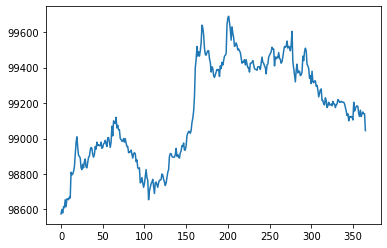

In [ ]:
plt.plot(data_frame1.loc[0:365, '<CLOSE>'])

In [ ]:
# Horarios das operações
horarios = data_frame1.loc[:, '<TIME>'].unique()
horarios.sort()
horarios

array(['09:00:00', '09:01:00', '09:02:00', '09:03:00', '09:04:00',
       '09:05:00', '09:06:00', '09:07:00', '09:08:00', '09:09:00',
       '09:10:00', '09:11:00', '09:12:00', '09:13:00', '09:14:00',
       '09:15:00', '09:16:00', '09:17:00', '09:18:00', '09:19:00',
       '09:20:00', '09:21:00', '09:22:00', '09:23:00', '09:24:00',
       '09:25:00', '09:26:00', '09:27:00', '09:28:00', '09:29:00',
       '09:30:00', '09:31:00', '09:32:00', '09:33:00', '09:34:00',
       '09:35:00', '09:36:00', '09:37:00', '09:38:00', '09:39:00',
       '09:40:00', '09:41:00', '09:42:00', '09:43:00', '09:44:00',
       '09:45:00', '09:46:00', '09:47:00', '09:48:00', '09:49:00',
       '09:50:00', '09:51:00', '09:52:00', '09:53:00', '09:54:00',
       '09:55:00', '09:56:00', '09:57:00', '09:58:00', '09:59:00',
       '10:00:00', '10:01:00', '10:02:00', '10:03:00', '10:04:00',
       '10:05:00', '10:06:00', '10:07:00', '10:08:00', '10:09:00',
       '10:10:00', '10:11:00', '10:12:00', '10:13:00', '10:14:

In [ ]:
# Dado um horario, Quanto subiu, Quanto desceu, Quanto manteve?
data_frame2 = pd.DataFrame(columns=['0','1','2'],index=horarios)

for horario in horarios:
        data_frame2.loc[horario]['0'] = qnt_subir(data_frame1.loc[lambda data_frame1: data_frame1['<TIME>'] == horario],0).shape[0]
        data_frame2.loc[horario]['1'] = qnt_subir(data_frame1.loc[lambda data_frame1: data_frame1['<TIME>'] == horario],1).shape[0]
        data_frame2.loc[horario]['2'] = qnt_subir(data_frame1.loc[lambda data_frame1: data_frame1['<TIME>'] == horario],2).shape[0]

data_frame2


,0,1,2
09:00:00,121,143,8
09:01:00,143,123,7
09:02:00,141,132,5
09:03:00,147,144,4
09:04:00,145,146,6
...,...,...,...
18:21:00,58,68,12
18:22:00,59,71,8
18:23:00,53,76,9
18:24:00,62,72,4


In [ ]:
# Separar por horas São 8 horas inteiras de mercado mais as 18
for x in range(0,540,60):
    data_frame2= data_frame2.append(pd.DataFrame(data= {'0': data_frame2.loc[horarios[x]:horarios[x+60],'0'].sum(),
                                '1': data_frame2.loc[horarios[x]:horarios[x+60],'1'].sum(),
                                '2': data_frame2.loc[horarios[x]:horarios[x+60],'2'].sum()},
                                index=[x/60],
                                columns=data_frame2.columns))
    data_frame2= data_frame2.drop(horarios[x:x+60])

# Add linha 18horas
data_frame2= data_frame2.append(pd.DataFrame(data= {'0': data_frame2.loc['18:00:00':'18:31:00','0'].sum(),
                                '1': data_frame2.loc['18:00:00':'18:31:00','1'].sum(),
                                '2': data_frame2.loc['18:00:00':'18:31:00','2'].sum()},
                                index=[9.0],
                                columns=data_frame2.columns))
data_frame2= data_frame2.drop(horarios[540:566])

In [ ]:
data_frame2

,0,1,2
0.0,9086,8790,948
1.0,9140,9220,611
2.0,9209,9075,699
3.0,9047,9132,854
4.0,9133,8997,963
5.0,9107,9004,982
6.0,9078,9018,997
7.0,9061,8948,1079
8.0,8550,8302,1192
9.0,1575,1672,206


In [ ]:
a = pd.DataFrame()

for x in range(0, data_frame1.shape[0] - 30, 20):
  b = pd.DataFrame(data_frame1.loc[x:(x+19), '<CLOSE>'])
  b = b.reset_index()
  b = b.drop(['index'], axis=1)

  a = pd.concat([a,b.T])

In [ ]:
len(a)

8551

In [ ]:
alpha = [data_frame1.loc[x, 'Subiu'] for x in range(20, data_frame1.shape[0] - 10, 20)]

In [ ]:
len(alpha)

8551

In [ ]:
alpha = []

In [ ]:
a['label'] = alpha

In [ ]:
a[:][:-2].values

array([[9.85750e+04, 9.86000e+04, 9.85800e+04, ..., 9.89750e+04,
        9.90100e+04, 0.00000e+00],
       [9.89500e+04, 9.89050e+04, 9.89000e+04, ..., 9.89100e+04,
        9.88950e+04, 1.00000e+00],
       [9.89100e+04, 9.89550e+04, 9.89400e+04, ..., 9.89800e+04,
        9.89500e+04, 1.00000e+00],
       ...,
       [1.12475e+05, 1.12565e+05, 1.12565e+05, ..., 1.12505e+05,
        1.12490e+05, 1.00000e+00],
       [1.12540e+05, 1.12480e+05, 1.12480e+05, ..., 1.12515e+05,
        1.12490e+05, 1.00000e+00],
       [1.12495e+05, 1.12505e+05, 1.12515e+05, ..., 1.12590e+05,
        1.12550e+05, 0.00000e+00]])

In [ ]:
a['label'].values

array([0., 1., 1., ..., 0., 0., 0.])